## AG's News Topic Classification Dataset

### Three architectures of neural networks are used:

#### 1D Convolutional Neural Network 
#### Recurrent neural network LSTM
#### GRU Recurrent Neural Network

In [80]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, MaxPooling1D, Conv1D, GlobalMaxPooling1D, Dropout, LSTM, GRU, SpatialDropout1D
from tensorflow.keras import utils
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras import utils
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [81]:
# Maximum number of words
num_words = 10000
# Maximum news length
max_news_len = 30
# Number of news classes
nb_classes = 4

### For some reason on different IDE !wget either works or not but to make sure to download please try wget... command in terminal. That should work 100%

In [82]:
!wget https://github.com/mhjabreel/CharCnn_Keras/raw/master/data/ag_news_csv/train.csv -O train.csv # Loading train data
!wget https://github.com/mhjabreel/CharCnn_Keras/raw/master/data/ag_news_csv/test.csv -O test.csv # Loading testing data
!wget https://raw.githubusercontent.com/mhjabreel/CharCnn_Keras/master/data/ag_news_csv/classes.txt -O classes.txt # Loading class names

"wget" �� ���� ����७��� ��� ���譥�
��������, �ᯮ��塞�� �ணࠬ��� ��� ������ 䠩���.
"wget" �� ���� ����७��� ��� ���譥�
��������, �ᯮ��塞�� �ணࠬ��� ��� ������ 䠩���.
"wget" �� ���� ����७��� ��� ���譥�
��������, �ᯮ��塞�� �ணࠬ��� ��� ������ 䠩���.


### Same with command !cat classes.txt, it returns gibberish in my vscode, but cat classes.txt command in terminal returns correct output

In [83]:
!cat classes.txt

"cat" �� ���� ����७��� ��� ���譥�
��������, �ᯮ��塞�� �ணࠬ��� ��� ������ 䠩���.


### Getting train data

In [84]:
train_set = pd.read_csv('train.csv', 
                    header=None, 
                    names=['class', 'title', 'text'])

### Choosing data for training

In [85]:
news = train_set['text']
news[:5]

0    Reuters - Short-sellers, Wall Street's dwindli...
1    Reuters - Private investment firm Carlyle Grou...
2    Reuters - Soaring crude prices plus worries\ab...
3    Reuters - Authorities have halted oil export\f...
4    AFP - Tearaway world oil prices, toppling reco...
Name: text, dtype: object

### Getting correct answers

In [86]:
y_train = utils.to_categorical(train_set['class'] - 1, nb_classes)
y_train

array([[0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       ...,
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.]], dtype=float32)

### Text tokenization


In [87]:
tokenizer = Tokenizer(num_words=num_words)
tokenizer.fit_on_texts(news)
tokenizer.word_index

{'the': 1,
 'a': 2,
 'to': 3,
 'of': 4,
 'in': 5,
 'and': 6,
 'on': 7,
 'for': 8,
 '39': 9,
 's': 10,
 'that': 11,
 'with': 12,
 'as': 13,
 'its': 14,
 'at': 15,
 'said': 16,
 'is': 17,
 'by': 18,
 'it': 19,
 'has': 20,
 'new': 21,
 'an': 22,
 'from': 23,
 'reuters': 24,
 'his': 25,
 'will': 26,
 'was': 27,
 'after': 28,
 'have': 29,
 'be': 30,
 'their': 31,
 'two': 32,
 'are': 33,
 'us': 34,
 'over': 35,
 'quot': 36,
 'year': 37,
 'first': 38,
 'ap': 39,
 'he': 40,
 'but': 41,
 'gt': 42,
 'lt': 43,
 'this': 44,
 'more': 45,
 'monday': 46,
 'wednesday': 47,
 'one': 48,
 'tuesday': 49,
 'up': 50,
 'thursday': 51,
 'company': 52,
 'inc': 53,
 'friday': 54,
 'world': 55,
 'than': 56,
 'u': 57,
 '1': 58,
 'last': 59,
 'they': 60,
 'york': 61,
 'yesterday': 62,
 'against': 63,
 'about': 64,
 'who': 65,
 'not': 66,
 'were': 67,
 'into': 68,
 'out': 69,
 'three': 70,
 'been': 71,
 'president': 72,
 '2': 73,
 'had': 74,
 'million': 75,
 'corp': 76,
 'oil': 77,
 'when': 78,
 'week': 79,
 'time'

### Converting news to a numeric representation

In [88]:
sequences = tokenizer.texts_to_sequences(news)  

In [89]:
x_train = pad_sequences(sequences, maxlen=max_news_len)

### Convolutional Neural Network

In [90]:
model_cnn = Sequential([
    Embedding(num_words, 32, input_length=max_news_len),
    Conv1D(250, 5, padding='valid', activation='relu'),
    GlobalMaxPooling1D(),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(4, activation='softmax')])

model_cnn.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_10 (Embedding)    (None, 30, 32)            320000    
                                                                 
 conv1d_3 (Conv1D)           (None, 26, 250)           40250     
                                                                 
 global_max_pooling1d_3 (Glo  (None, 250)              0         
 balMaxPooling1D)                                                
                                                                 
 dense_16 (Dense)            (None, 64)                16064     
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_17 (Dense)            (None, 32)                2080      
                                                      

In [91]:
model_cnn.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [92]:
history_cnn = model_cnn.fit(x_train, 
                            y_train, 
                            epochs=5,
                            batch_size=128,
                            validation_split=0.1)

Epoch 1/5
844/844 [==============================] - 18s 21ms/step - loss: 0.4993 - accuracy: 0.8170 - val_loss: 0.3310 - val_accuracy: 0.8783
Epoch 2/5
844/844 [==============================] - 18s 21ms/step - loss: 0.2842 - accuracy: 0.9090 - val_loss: 0.3174 - val_accuracy: 0.8852
Epoch 3/5
844/844 [==============================] - 17s 20ms/step - loss: 0.2303 - accuracy: 0.9260 - val_loss: 0.3407 - val_accuracy: 0.8802
Epoch 4/5
844/844 [==============================] - 17s 20ms/step - loss: 0.1825 - accuracy: 0.9404 - val_loss: 0.3657 - val_accuracy: 0.8776
Epoch 5/5
844/844 [==============================] - 16s 19ms/step - loss: 0.1367 - accuracy: 0.9540 - val_loss: 0.4075 - val_accuracy: 0.8788


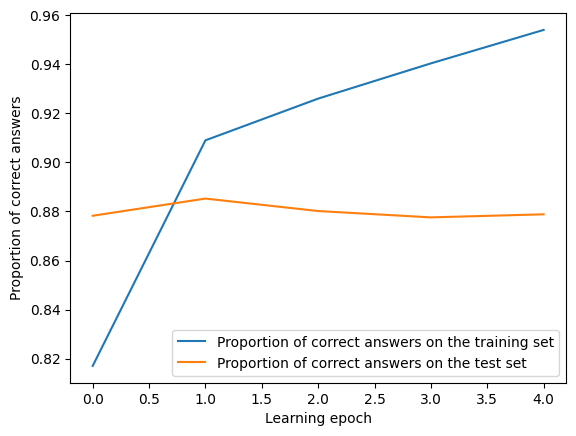

In [93]:
plt.plot(history_cnn.history['accuracy'],
          label='Proportion of correct answers on the training set')
plt.plot(history_cnn.history['val_accuracy'],
          label='Proportion of correct answers on the test set')
plt.xlabel('Learning epoch')
plt.ylabel('Proportion of correct answers')
plt.legend()
plt.show()

### LSTM NN

In [94]:
model_lstm = Sequential([   
    Embedding(num_words, 32, input_length=max_news_len),
    SpatialDropout1D(0.2),
    LSTM(16, dropout=0.2, recurrent_dropout=0.2),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(16, activation='relu'),
    Dropout(0.2),
    Dense(4, activation='softmax')])

model_lstm.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_11 (Embedding)    (None, 30, 32)            320000    
                                                                 
 spatial_dropout1d_5 (Spatia  (None, 30, 32)           0         
 lDropout1D)                                                     
                                                                 
 lstm_4 (LSTM)               (None, 16)                3136      
                                                                 
 dense_19 (Dense)            (None, 32)                544       
                                                                 
 dropout_3 (Dropout)         (None, 32)                0         
                                                                 
 dense_20 (Dense)            (None, 16)                528       
                                                     

In [95]:
model_lstm.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [96]:
history_lstm = model_lstm.fit(x_train, 
                              y_train, 
                              epochs=5,
                              batch_size=128,
                              validation_split=0.1)

Epoch 1/5
844/844 [==============================] - 23s 24ms/step - loss: 0.5728 - accuracy: 0.7907 - val_loss: 0.3451 - val_accuracy: 0.8782
Epoch 2/5
844/844 [==============================] - 20s 24ms/step - loss: 0.3485 - accuracy: 0.8947 - val_loss: 0.3239 - val_accuracy: 0.8903
Epoch 3/5
844/844 [==============================] - 20s 24ms/step - loss: 0.3091 - accuracy: 0.9068 - val_loss: 0.3204 - val_accuracy: 0.8878
Epoch 4/5
844/844 [==============================] - 20s 24ms/step - loss: 0.2874 - accuracy: 0.9115 - val_loss: 0.3331 - val_accuracy: 0.8829
Epoch 5/5
844/844 [==============================] - 21s 24ms/step - loss: 0.2696 - accuracy: 0.9164 - val_loss: 0.3312 - val_accuracy: 0.8848


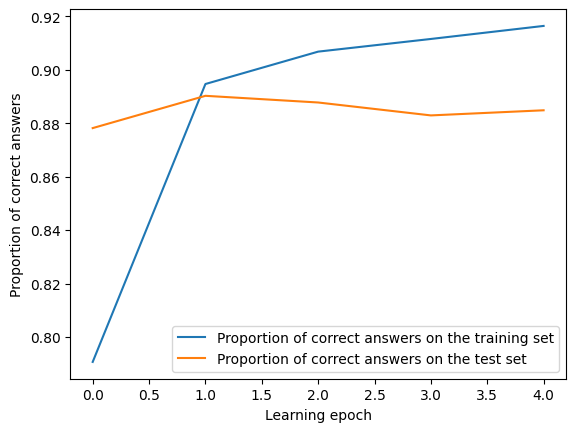

In [97]:
plt.plot(history_lstm.history['accuracy'],
          label='Proportion of correct answers on the training set')
plt.plot(history_lstm.history['val_accuracy'],
          label='Proportion of correct answers on the test set')
plt.xlabel('Learning epoch')
plt.ylabel('Proportion of correct answers')
plt.legend()
plt.show()

### GRU NN

In [98]:
model_gru = Sequential([   
    Embedding(num_words, 32, input_length=max_news_len),
    SpatialDropout1D(0.2),
    GRU(16, dropout=0.2, recurrent_dropout=0.2),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(16, activation='relu'),
    Dropout(0.2),
    Dense(4, activation='softmax')])

model_gru.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_12 (Embedding)    (None, 30, 32)            320000    
                                                                 
 spatial_dropout1d_6 (Spatia  (None, 30, 32)           0         
 lDropout1D)                                                     
                                                                 
 gru_2 (GRU)                 (None, 16)                2400      
                                                                 
 dense_22 (Dense)            (None, 32)                544       
                                                                 
 dropout_5 (Dropout)         (None, 32)                0         
                                                                 
 dense_23 (Dense)            (None, 16)                528       
                                                     

In [99]:
model_gru.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [100]:
history_gru = model_gru.fit(x_train, 
                              y_train, 
                              epochs=5,
                              batch_size=128,
                              validation_split=0.1)

Epoch 1/5
844/844 [==============================] - 20s 21ms/step - loss: 0.6673 - accuracy: 0.7334 - val_loss: 0.3371 - val_accuracy: 0.8809
Epoch 2/5
844/844 [==============================] - 18s 21ms/step - loss: 0.3581 - accuracy: 0.8929 - val_loss: 0.3065 - val_accuracy: 0.8936
Epoch 3/5
844/844 [==============================] - 18s 21ms/step - loss: 0.3147 - accuracy: 0.9057 - val_loss: 0.3089 - val_accuracy: 0.8906
Epoch 4/5
844/844 [==============================] - 18s 21ms/step - loss: 0.2912 - accuracy: 0.9121 - val_loss: 0.3179 - val_accuracy: 0.8880
Epoch 5/5
844/844 [==============================] - 18s 21ms/step - loss: 0.2714 - accuracy: 0.9165 - val_loss: 0.3254 - val_accuracy: 0.8834


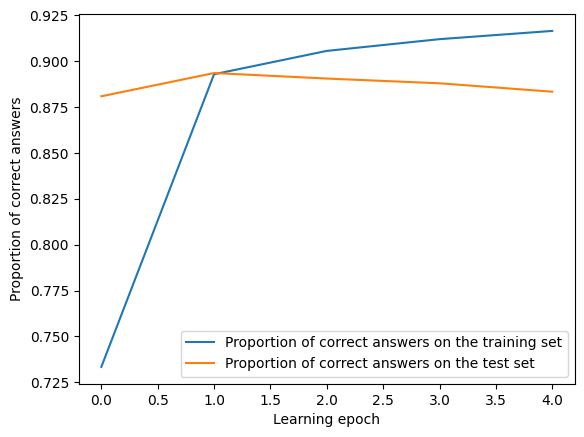

In [101]:
plt.plot(history_gru.history['accuracy'],
          label='Proportion of correct answers on the training set')
plt.plot(history_gru.history['val_accuracy'],
          label='Proportion of correct answers on the test set')
plt.xlabel('Learning epoch')
plt.ylabel('Proportion of correct answers')
plt.legend()
plt.show()

### Loading testing data

In [102]:
test_set = pd.read_csv('test.csv', 
                    header=None, 
                    names=['class', 'title', 'text'])

### Converting news to a numeric representation
### We can use a tokenizer trained on the train dataset.

In [103]:
test_sequences = tokenizer.texts_to_sequences(test_set['text'])
x_test = pad_sequences(test_sequences, maxlen=max_news_len)

y_test = utils.to_categorical(test_set['class'] - 1, nb_classes) # Correct answers

#### Evaluate the quality of the network on a test data set
#### 1D Convolutional Network
#### LSTM Network
#### GRU Network

In [104]:
_, cnn_acc = model_cnn.evaluate(x_test, y_test, verbose=1)
_, lstm_acc = model_lstm.evaluate(x_test, y_test, verbose=1)
_, gru_acc = model_gru.evaluate(x_test, y_test, verbose=1)


238/238 [==============================] - 1s 3ms/step - loss: 0.3377 - accuracy: 0.8899


In [105]:
print(f"1D Convulutional network accuracy {round(cnn_acc, 4)}")
print(f"LSTM network accuracy {round(lstm_acc, 4)}")
print(f"GRU network accuracy {round(gru_acc, 4)}\n")

best = max(gru_acc, max(cnn_acc, lstm_acc))

best_model = ''

if best == gru_acc:
    best_model = "GRU Network"
elif best == lstm_acc:
    best_model = "LSTM Network"
else:
    best_model = "1D Convolutional"

print(f"Best model is {best_model} with accuracy of {best}")

1D Convulutional network accuracy 0.8909
LSTM network accuracy 0.8913
GRU network accuracy 0.8899

Best model is LSTM Network with accuracy of 0.8913158178329468
